In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('coffee_cleaned.csv', encoding='utf-8',index_col=0)

df.head()

,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
0,1,0,3.5,328.1,7.5,2,24.9,78,Low,14.5,No,Other
1,2,0,1.0,94.1,6.2,2,20.0,67,Low,11.0,No,Service
2,3,0,5.3,503.7,5.9,1,22.7,59,Medium,11.2,Mild,Office
3,4,0,2.6,249.2,7.3,2,24.7,71,Low,6.6,Mild,Other
4,5,1,3.1,298.0,5.3,1,24.1,76,Medium,8.5,Mild,Student


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9772 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       9772 non-null   int64  
 1   Gender                   9772 non-null   int64  
 2   Coffee_Intake            9772 non-null   float64
 3   Caffeine_mg              9772 non-null   float64
 4   Sleep_Hours              9772 non-null   float64
 5   Sleep_Quality            9772 non-null   int64  
 6   Bmi                      9772 non-null   float64
 7   Heart_Rate               9772 non-null   int64  
 8   Stress_Level             9772 non-null   object 
 9   Physical_Activity_Hours  9772 non-null   float64
 10  Health_Issues            9772 non-null   object 
 11  Occupation               9772 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 992.5+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
stress_le=LabelEncoder()
stress_le.fit(df['Stress_Level'])
df['Stress_Level']=stress_le.transform(df['Stress_Level'])

health_issues_le=LabelEncoder()
health_issues_le.fit(df['Health_Issues'])
df['Health_Issues']=health_issues_le.transform(df['Health_Issues'])

occupation_le=LabelEncoder()
occupation_le.fit(df['Occupation'])
df['Occupation']=occupation_le.transform(df['Occupation'])

df.head()


,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
0,1,0,3.5,328.1,7.5,2,24.9,78,1,14.5,2,2
1,2,0,1.0,94.1,6.2,2,20.0,67,1,11.0,2,3
2,3,0,5.3,503.7,5.9,1,22.7,59,2,11.2,0,1
3,4,0,2.6,249.2,7.3,2,24.7,71,1,6.6,0,2
4,5,1,3.1,298.0,5.3,1,24.1,76,2,8.5,0,4


In [52]:
# Compare gender balance across the dataset
# df2['Gender']=df2['Gender'].map({'Male': 0, 'Female': 1})
map={0: "Male", 1: "Female"}


gender=df['Gender'].map(map)

data=gender.value_counts()

data




Gender
Female    5000
Male      4772
Name: count, dtype: int64

<Axes: xlabel='Gender'>

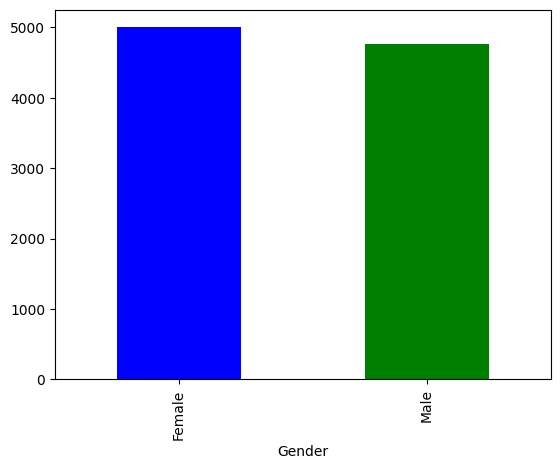

In [40]:
#plotting it using buiult in pyplot

data.plot(kind="bar", color=['blue', 'green'])

<Axes: ylabel='count'>

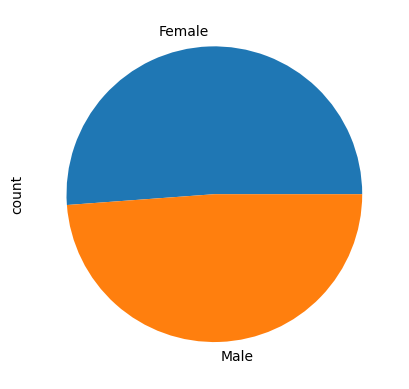

In [41]:
data.plot(kind="pie", color=['blue', 'green'])

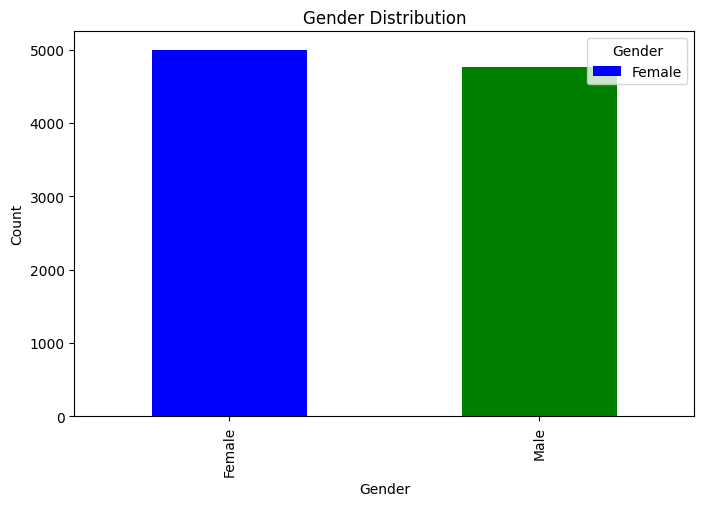

In [57]:
#plot with more details
plt.figure(figsize=(8,5)) #creates a blank canvas

data.plot(kind="bar", color=['blue', 'green'])

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Gender", labels=data.index, loc='upper right')
plt.show()



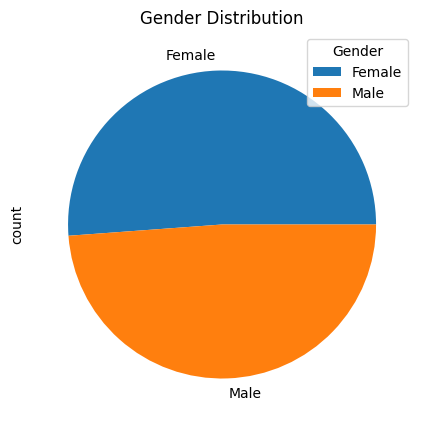

In [ ]:
#plot with more details
plt.figure(figsize=(8,5)) #creates a blank canvas

data.plot(kind="pie", color=['blue', 'green'])

plt.title("Gender Distribution")

plt.legend(title="Gender", labels=data.index, loc='upper right')
plt.show()


The distribution of males vs females is balanced with a 3% variance only whicxh makes the dataset gender balanced.

In [ ]:
df.head()

,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
0,1,0,3.5,328.1,7.5,2,24.9,78,1,14.5,2,2
1,2,0,1.0,94.1,6.2,2,20.0,67,1,11.0,2,3
2,3,0,5.3,503.7,5.9,1,22.7,59,2,11.2,0,1
3,4,0,2.6,249.2,7.3,2,24.7,71,1,6.6,0,2
4,5,1,3.1,298.0,5.3,1,24.1,76,2,8.5,0,4


In [ ]:
occupation_le.classes_


array(['Healthcare', 'Office', 'Other', 'Service', 'Student'],
      dtype=object)

<Figure size 1000x600 with 0 Axes>

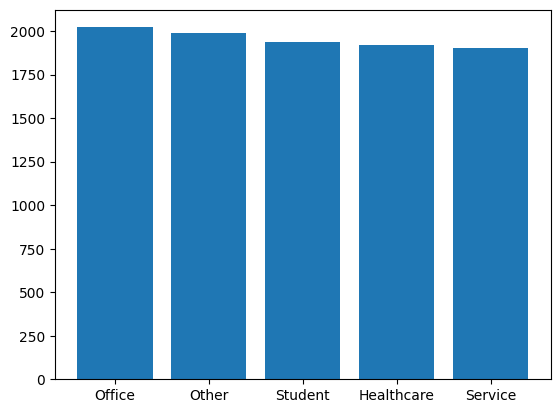

In [ ]:
# Study how occupation distribution
# x-axis: gender

occupation_count=df['Occupation'].value_counts()
occupation_count

#replace index with labels
occupation_count.index = occupation_le.inverse_transform(occupation_count.index)

plt.figure(figsize=(10, 6))

fig,ax=plt.subplots() #creating a subplot
ax.bar(occupation_count.index, occupation_count.values)


plt.show()



In [94]:
# Study how occupation categories vary with gender
# x-axis: gender

occupation_count=df['Occupation'].groupby(df['Gender']).value_counts()
occupation_count


Gender  Occupation
0       1              986
        4              981
        2              977
        3              927
        0              901
1       1             1036
        0             1019
        2             1015
        3              976
        4              954
Name: count, dtype: int64

In [95]:

occupation_count.unstack()


Occupation,0,1,2,3,4
Gender,,,,,
0,901,986,977,927,981
1,1019,1036,1015,976,954


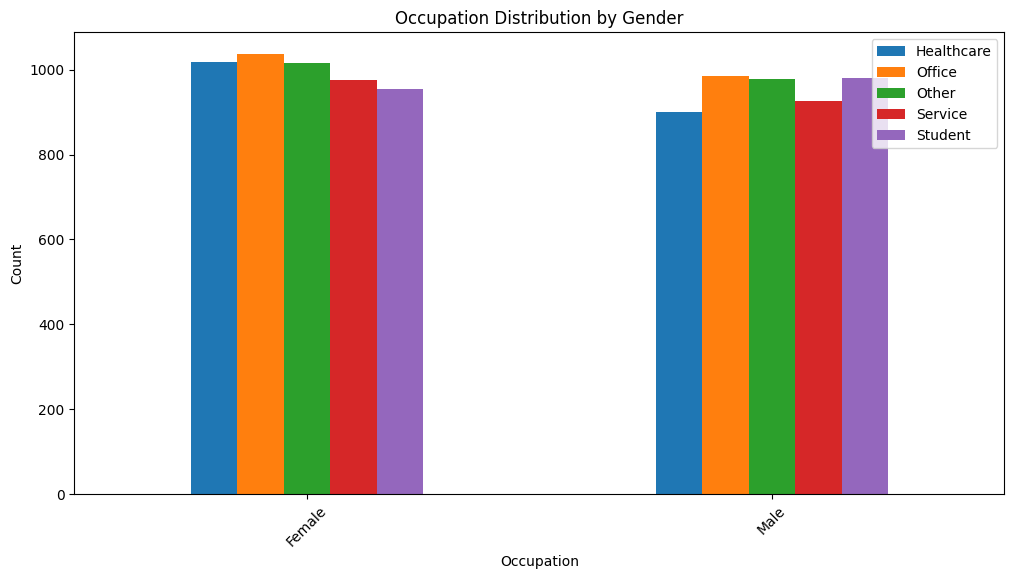

In [119]:

#plot occupation distribution by gender
fig, ax = plt.subplots(figsize=(12, 6))

map={0: "Male", 1: "Female"}
df2=df.copy()
df2['Gender']=df2['Gender'].map(map)
df2['Occupation']=occupation_le.inverse_transform(df2['Occupation'])
occupation_count=df2['Occupation'].groupby(df2['Gender']).value_counts()



data=occupation_count.unstack()


data.plot(kind='bar', ax=ax)



ax.set_title('Occupation Distribution by Gender')
ax.set_ylabel('Count')
ax.set_xlabel('Occupation')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Study how occupation categories vary with age and gender 
#stacked bar chart
#x-axis: Age group
#y-axis: count of individuals in each occupation category with 2 plots one for male for female



KeyError: 'Age'

In [124]:
df2.head()

,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
0,1,Male,3.5,328.1,7.5,2,24.9,78,1,14.5,2,Other
1,2,Male,1.0,94.1,6.2,2,20.0,67,1,11.0,2,Service
2,3,Male,5.3,503.7,5.9,1,22.7,59,2,11.2,0,Office
3,4,Male,2.6,249.2,7.3,2,24.7,71,1,6.6,0,Other
4,5,Female,3.1,298.0,5.3,1,24.1,76,2,8.5,0,Student


In [ ]:
#filter office workers
office_workers=df2.query('Occupation=="Office"')
office_workers.head()

office_workers.describe()


,ID,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues
count,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.00000,2022.000000,2022.000000,2022.000000
mean,5102.747280,2.481058,235.703165,6.606677,1.640950,24.159842,70.52275,1.091988,7.385064,1.241345
std,2905.471162,1.422726,135.193962,1.227952,0.843912,3.879719,9.76666,0.546180,4.239627,0.944848
min,3.000000,0.000000,0.000000,3.000000,0.000000,15.000000,50.00000,0.000000,0.000000,0.000000
25%,2593.500000,1.400000,137.475000,5.800000,1.000000,21.500000,64.00000,1.000000,3.800000,0.000000
50%,5122.000000,2.500000,234.150000,6.600000,2.000000,24.200000,70.00000,1.000000,7.500000,2.000000
75%,7655.750000,3.500000,328.275000,7.500000,2.000000,26.900000,77.00000,1.000000,10.900000,2.000000
max,9991.000000,7.700000,733.100000,10.000000,3.000000,36.000000,107.00000,2.000000,15.000000,2.000000


In [136]:
office_genders=office_workers.groupby('Gender').size()
office_genders

Gender
Female    1036
Male       986
dtype: int64

We have 2022 office workers

Coffee_Intake
0.0    543
2.7    296
2.1    267
2.8    262
2.6    261
      ... 
7.8      2
7.7      2
7.1      1
8.2      1
7.2      1
Name: count, Length: 78, dtype: int64

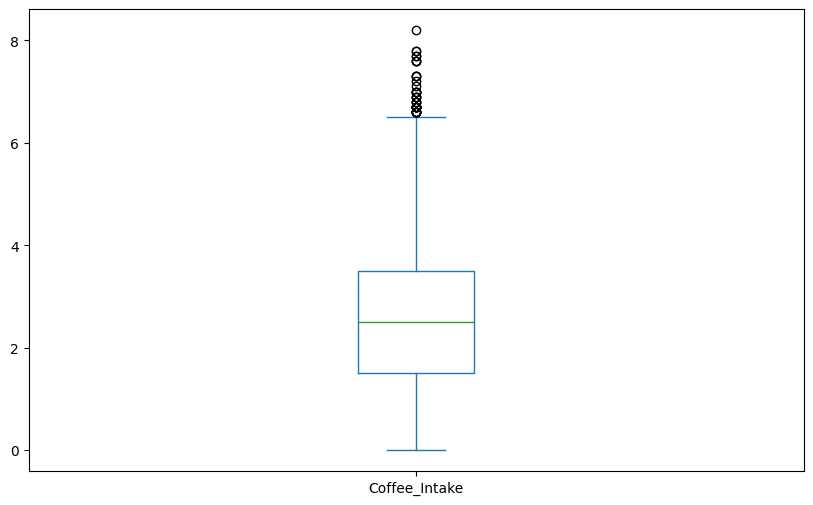

In [ ]:
# Assess the dependence (>5) of It professionals on coffee (coffee_intake). Find the addicts

df2['Coffee_Intake'].plot(kind='box', figsize=(10, 6))




In [142]:
addicts=df2.query('Occupation=="Office" & Coffee_Intake>5')
addicts.describe()

,ID,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000
mean,5202.134146,5.639024,535.467073,6.031707,1.853659,24.182927,71.402439,1.02439,6.450000,0.926829
std,2779.850235,0.596441,56.632214,1.242248,0.847974,3.758178,9.720615,0.70230,4.109677,0.939930
min,3.000000,5.100000,479.800000,3.300000,0.000000,16.200000,55.000000,0.00000,0.400000,0.000000
25%,3341.000000,5.200000,494.425000,5.125000,1.000000,21.625000,64.000000,1.00000,2.925000,0.000000
50%,5472.000000,5.400000,514.650000,6.100000,2.000000,24.050000,71.000000,1.00000,5.750000,1.000000
75%,7509.500000,5.900000,560.025000,6.900000,2.000000,26.150000,77.750000,1.75000,9.700000,2.000000
max,9978.000000,7.700000,733.100000,9.000000,3.000000,34.900000,97.000000,2.00000,14.700000,2.000000


In [145]:
percentage=82/2022*100
percentage

4.055390702274975

Office workers are not consired acoffee addicts as only 4.1% consume more than 5 cups per day

In [144]:
#find the worst offenders top 20
top20=addicts.nlargest(20, 'Coffee_Intake')

top20


,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
3929,3922,Male,7.7,733.1,7.9,2,25.8,72,1,7.7,2,Office
8468,8461,Male,7.7,729.2,7.2,2,22.5,77,1,3.0,2,Office
132,125,Female,7.6,722.4,7.5,2,20.4,73,1,10.6,2,Office
4967,4960,Female,6.6,623.1,7.2,2,24.3,71,1,14.1,2,Office
5063,5056,Female,6.6,630.8,7.5,2,27.0,88,1,9.7,2,Office
2749,2742,Male,6.5,618.1,6.4,2,24.4,71,1,8.1,2,Office
3525,3518,Female,6.5,621.4,6.2,2,34.9,66,1,4.8,0,Office
7554,7547,Female,6.5,617.5,5.3,1,27.3,75,2,13.6,0,Office
9195,9188,Female,6.5,614.1,4.4,3,24.0,65,0,4.5,0,Office
820,813,Female,6.4,606.0,6.9,2,25.6,97,1,5.7,0,Office


In [146]:
df2.head()

,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
0,1,Male,3.5,328.1,7.5,2,24.9,78,1,14.5,2,Other
1,2,Male,1.0,94.1,6.2,2,20.0,67,1,11.0,2,Service
2,3,Male,5.3,503.7,5.9,1,22.7,59,2,11.2,0,Office
3,4,Male,2.6,249.2,7.3,2,24.7,71,1,6.6,0,Other
4,5,Female,3.1,298.0,5.3,1,24.1,76,2,8.5,0,Student


In [148]:
#correlation analysis
df.corr()

,ID,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Bmi,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation
ID,1.000000,0.024302,-0.006614,-0.006827,-0.011426,0.012524,-0.009971,-0.002753,-0.012102,-0.009422,-0.003775,-0.004428
Gender,0.024302,1.000000,-0.008311,-0.008310,-0.000250,-0.001867,-0.007652,0.006163,0.000975,0.000539,-0.005157,-0.021020
Coffee_Intake,-0.006614,-0.008311,1.000000,0.999813,-0.188964,0.096209,-0.007971,0.058493,0.008304,0.005023,-0.104906,-0.002035
Caffeine_mg,-0.006827,-0.008310,0.999813,1.000000,-0.189178,0.096096,-0.008399,0.058411,0.008625,0.005308,-0.105131,-0.002457
Sleep_Hours,-0.011426,-0.000250,-0.188964,-0.189178,1.000000,-0.511358,0.007338,-0.038122,-0.011352,-0.011496,0.565973,-0.003919
Sleep_Quality,0.012524,-0.001867,0.096209,0.096096,-0.511358,1.000000,-0.012892,0.017057,-0.577632,0.013481,-0.001195,0.006273
Bmi,-0.009971,-0.007652,-0.007971,-0.008399,0.007338,-0.012892,1.000000,-0.009833,-0.007742,0.002665,-0.109293,0.001746
Heart_Rate,-0.002753,0.006163,0.058493,0.058411,-0.038122,0.017057,-0.009833,1.000000,0.016321,-0.004506,-0.019223,0.012001
Stress_Level,-0.012102,0.000975,0.008304,0.008625,-0.011352,-0.577632,-0.007742,0.016321,1.000000,-0.008278,-0.231501,0.004826
Physical_Activity_Hours,-0.009422,0.000539,0.005023,0.005308,-0.011496,0.013481,0.002665,-0.004506,-0.008278,1.000000,0.002223,-0.004404


<Axes: >

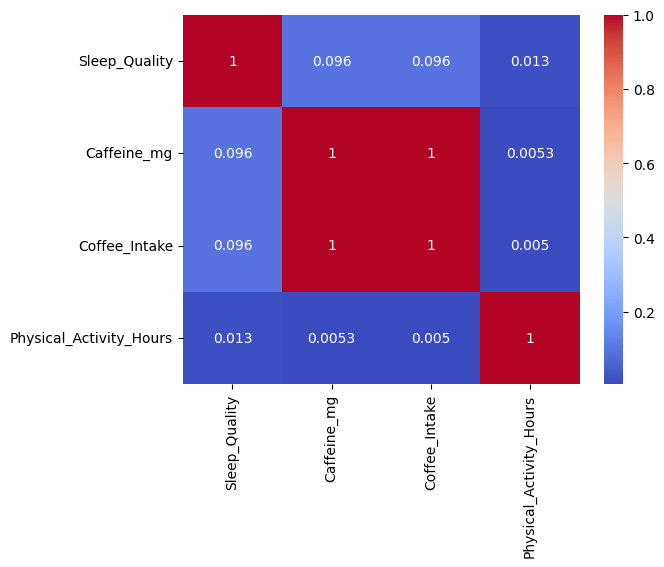

In [153]:
#heatmap with seaborn
# sleep quality, caffeine, physical activity
df4 = df[['Sleep_Quality', 'Caffeine_mg','Coffee_Intake', 'Physical_Activity_Hours']]
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')

There no correlation whatsoever between sleep quality, caffeine, physical activity. Someone may take coffee before sleep.

In [ ]:
# Compare stress levels across occupations.

df2.head()
stress_le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [180]:
df5=df.copy()
df5['Occupation']=occupation_le.inverse_transform(df5['Occupation'])
df5['Stress_Level']=stress_le.inverse_transform(df5['Stress_Level'])
# occupation_categories.head()
df5.head()
occupation_categorie_streess=df5.groupby(['Occupation', 'Stress_Level']).size().unstack()
occupation_categorie_streess

Stress_Level,High,Low,Medium
Occupation,,,
Healthcare,181,1356,383
Office,217,1402,403
Other,181,1384,427
Service,177,1301,425
Student,184,1383,368


<Figure size 1200x600 with 0 Axes>

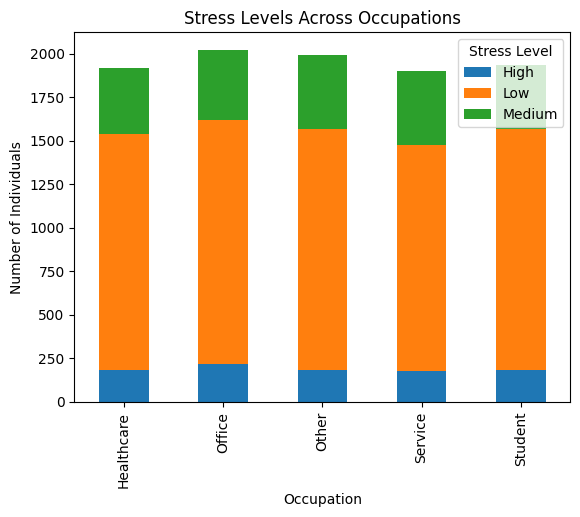

In [182]:
# stacked bar chart (high low medium) for each occupation
plt.figure(figsize=(12,6))
occupation_categorie_streess.plot(kind='bar', stacked=True)
plt.title('Stress Levels Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.legend(title='Stress Level')


Stress levels are similar in every category with 70% avg - low stress acrss every category

In [189]:
df.columns

Index(['ID', 'Gender', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours',
       'Sleep_Quality', 'Bmi', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

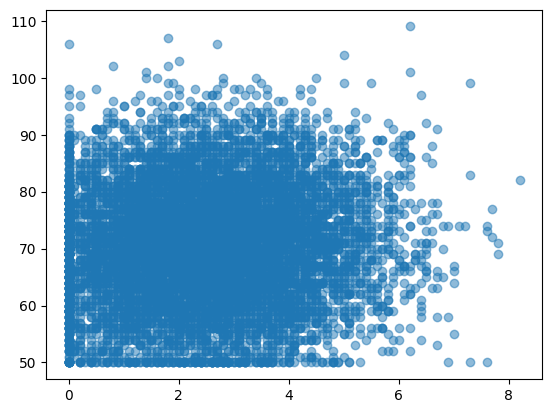

In [190]:
# does coffee consumption affect sleep hours

df.head()

plt.figure(figsize=(10, 6))

fig,ax=plt.subplots()
ax.scatter(df['Coffee_Intake'], df['Heart_Rate'], alpha=0.5)

plt.show()


In [212]:
#bin coffee intake
bins=[0,1,2,4,6,8]
coffee_intake_binned=pd.cut(df['Coffee_Intake'], bins=bins,right=False)
coffee_intake_binned.value_counts()


Coffee_Intake
[2, 4)    4615
[1, 2)    2062
[0, 1)    1495
[4, 6)    1475
[6, 8)     124
Name: count, dtype: int64

/var/folders/5g/7m5tb_kn729bgtcb25k58dlc0000gn/T/ipykernel_59413/3446979663.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorised_hr=df.groupby(coffee_intake_binned)['Heart_Rate'].mean()


<Axes: xlabel='Coffee_Intake'>

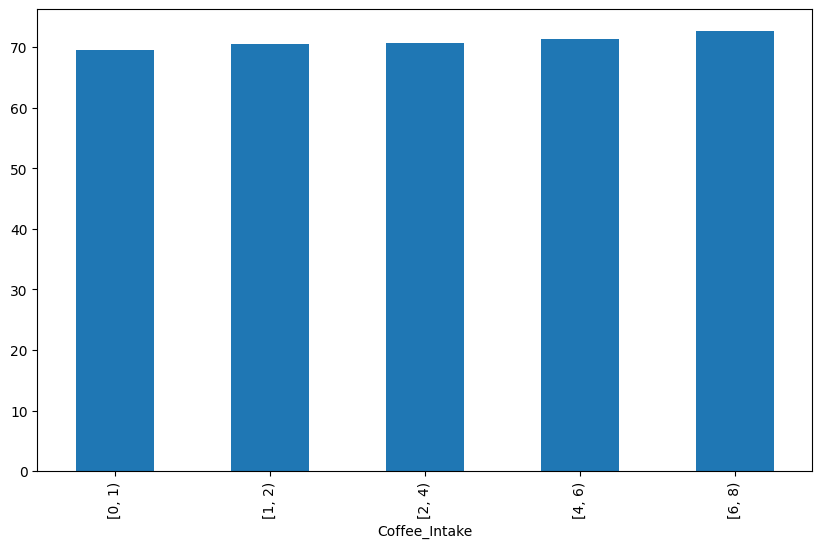

In [213]:
#average heart rate by coffee intake
categorised_hr=df.groupby(coffee_intake_binned)['Heart_Rate'].mean()

categorised_hr.plot(kind='bar', figsize=(10, 6))

/var/folders/5g/7m5tb_kn729bgtcb25k58dlc0000gn/T/ipykernel_59413/1804628025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorised_hr=df.groupby(coffee_intake_binned)['Sleep_Hours'].mean()


<Axes: xlabel='Coffee_Intake'>

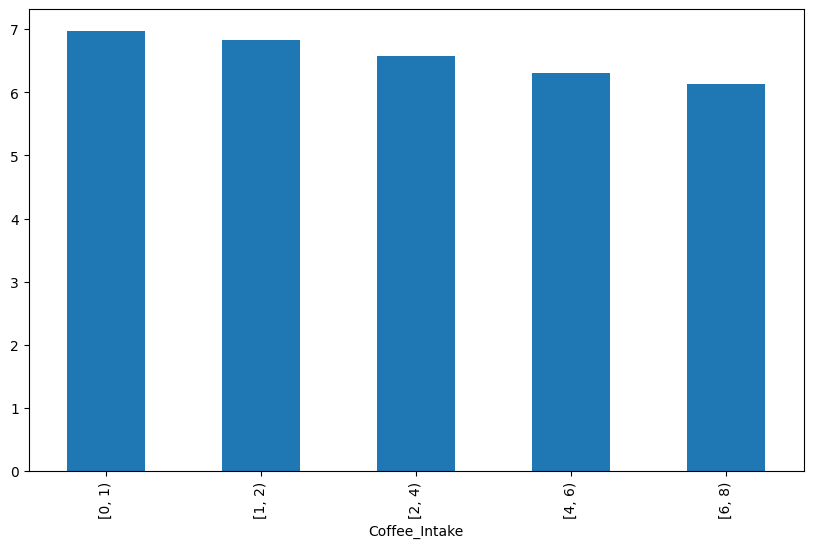

In [214]:
#average heart rate by coffee intake
categorised_hr=df.groupby(coffee_intake_binned)['Sleep_Hours'].mean()

categorised_hr.plot(kind='bar', figsize=(10, 6))

There is a minimal decrease in sleep hours with up to 30 mins less sleep when drinking more than 4 cups of coffee